In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df=pd.read_csv("Files/stress-strain - Sheet1.csv")
df

,True Strain,True Stress
0,0.000021,-4.061388
1,0.000078,-2.807566
2,0.000135,-1.553800
3,0.000193,-0.300266
4,0.000250,0.944688
...,...,...
871,0.064715,515.988678
872,0.064885,515.722120
873,0.065039,515.211708
874,0.065226,513.956728


In [156]:
df.columns

Index(['True Strain', 'True Stress'], dtype='object')

In [157]:
df.describe()

,True Strain,True Stress
count,876.000000,876.000000
mean,0.028892,351.943795
std,0.019003,157.075155
min,0.000021,-4.061388
25%,0.011901,234.298362
50%,0.026991,403.995626
75%,0.044846,493.728552
max,0.065976,516.043491


In [158]:
new_stress=df["True Stress"][4:]
new_strain=df["True Strain"][4:]

In [159]:
df["True Stress"]=new_stress
df["True Strain"]=new_strain
df=df.dropna()
df=df.set_index(np.arange(0,872))
df

,True Strain,True Stress
0,0.000250,0.944688
1,0.000306,2.181064
2,0.000363,3.417301
3,0.000420,4.653309
4,0.000476,5.889266
...,...,...
867,0.064715,515.988678
868,0.064885,515.722120
869,0.065039,515.211708
870,0.065226,513.956728


Text(0, 0.5, 'Stress')

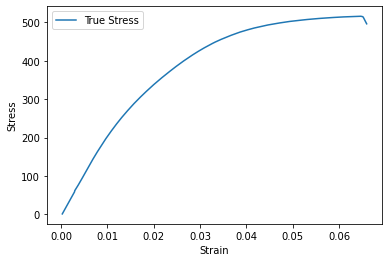

In [160]:
df.plot('True Strain','True Stress')
plt.xlabel("Strain")
plt.ylabel("Stress")

In [161]:
slopes=[]
for i in range(871):
    slope=(df["True Stress"][i+1]-df["True Stress"][i])/(df["True Strain"][i+1]-df["True Strain"][i])
    slopes.append(slope)
slopes=np.array(slopes)
slopes[:10]

array([21837.55548687, 21833.539994  , 21830.27054522, 21826.28175605,
       21822.62734433, 21818.70875629, 21815.33547852, 21811.54349562,
       21807.99985271, 21804.79931509])

In [162]:
df['True Strain'][871]

0.065976085

In [163]:
m=np.mean(slopes[:10])

In [164]:
x_int=(0.2*df['True Strain'][871])/100+df["True Strain"][0] 

In [165]:
y_line=m*(new_strain-x_int)

In [166]:
# y_line.shape
y_line

4        -2.879311
5        -1.643879
6        -0.408359
7         0.827116
8         2.062766
          ...     
871    1403.809986
872    1407.529375
873    1410.880209
874    1414.970050
875    1431.327648
Name: True Strain, Length: 872, dtype: float64

Text(0, 0.5, 'Stress')

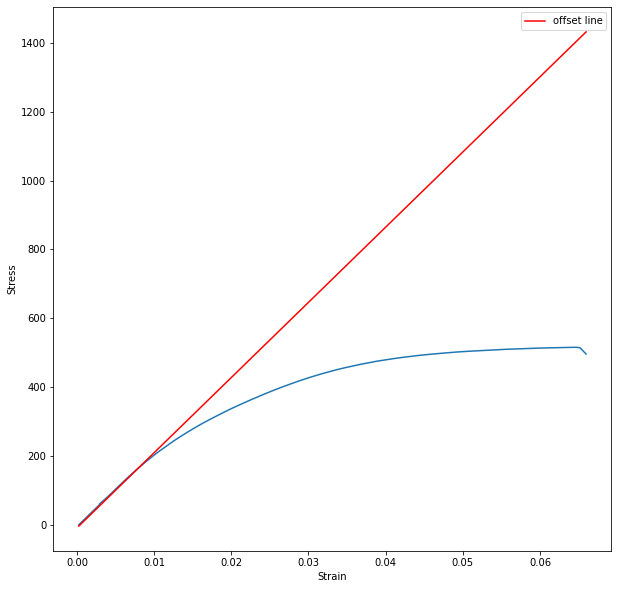

In [167]:
plt.figure(figsize=(10,10))
plt.plot(df['True Strain'],df['True Stress'])
plt.plot(new_strain,y_line,'r',label='offset line')
plt.legend()
plt.xlabel("Strain")
plt.ylabel("Stress")

In [168]:
df

,True Strain,True Stress
0,0.000250,0.944688
1,0.000306,2.181064
2,0.000363,3.417301
3,0.000420,4.653309
4,0.000476,5.889266
...,...,...
867,0.064715,515.988678
868,0.064885,515.722120
869,0.065039,515.211708
870,0.065226,513.956728


In [169]:
df['line']=np.array(y_line)

In [170]:
df['difference']=np.abs(df['True Stress']-df['line'])

In [171]:
df

,True Strain,True Stress,line,difference
0,0.000250,0.944688,-2.879311,3.823998
1,0.000306,2.181064,-1.643879,3.824943
2,0.000363,3.417301,-0.408359,3.825661
3,0.000420,4.653309,0.827116,3.826193
4,0.000476,5.889266,2.062766,3.826500
...,...,...,...,...
867,0.064715,515.988678,1403.809986,887.821308
868,0.064885,515.722120,1407.529375,891.807255
869,0.065039,515.211708,1410.880209,895.668501
870,0.065226,513.956728,1414.970050,901.013322


In [172]:
np.argmin(df['difference'])

148

In [173]:
yield_stress=df['True Stress'][148]
yield_stress

165.8250061

In [174]:
consider_stress=df['True Stress'][149:]
consider_strain=df['True Strain'][149:]

In [175]:
A,B=[],[]
n=np.linspace(0,3,50)
for i in range(150):
    A.append(np.random.rand()*515)
    B.append(np.random.rand()*3500)

In [176]:
A=np.array(A)
B=np.array(B)
# n=np.array(n)

Text(0.5, 1.0, 'Scatter graph of all A values')

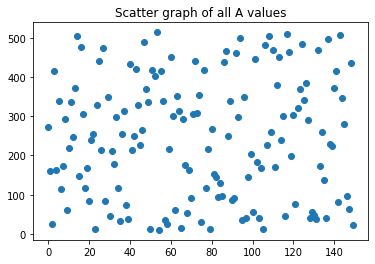

In [177]:
plt.scatter(np.arange(0,150),A)
plt.title('Scatter graph of all A values')

Text(0.5, 1.0, 'Scatter graph of all B values')

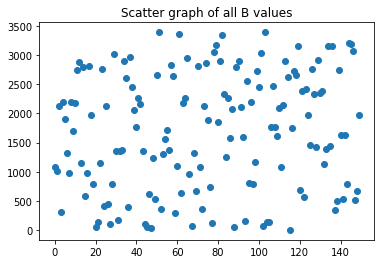

In [178]:
plt.scatter(np.arange(0,150),B)
plt.title('Scatter graph of all B values')


Text(0.5, 1.0, 'Scatter graph of all n values')

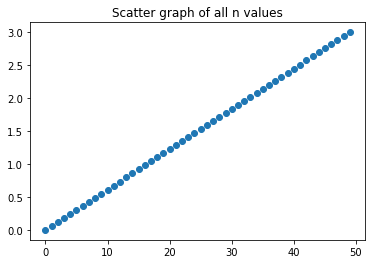

In [179]:
plt.scatter(np.arange(0,50),n)
plt.title('Scatter graph of all n values')

In [180]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [181]:
new_A,new_B,new_n,new_mae,new_rmse=[],[],[],[],[]
exp_strain=np.array(consider_strain)
exp_stress=np.array(consider_stress)

In [182]:
for a in A:
    for b in B:
        for N in n:
            new_A.append(a)
            new_B.append(b)
            new_n.append(N)
            calc_stress=a+b*(np.power(exp_strain,N))
            new_mae.append(mae(exp_stress,calc_stress))
            new_rmse.append(np.sqrt(mse(exp_stress,calc_stress)))

In [183]:
new_A=np.array(new_A)
new_B=np.array(new_B)
new_n=np.array(new_n)
new_mae=np.array(new_mae)
new_rmse=np.array(new_rmse)

In [184]:
final_df=pd.DataFrame({'A':new_A,'B':new_B,'n':new_n,'MAE':new_mae,'RMSE':new_rmse})
final_df

,A,B,n,MAE,RMSE
0,273.024230,1088.030482,0.000000,952.069674,957.684032
1,273.024230,1088.030482,0.061224,741.609579,745.258568
2,273.024230,1088.030482,0.122449,572.706727,575.453979
3,273.024230,1088.030482,0.183673,436.983541,439.529024
4,273.024230,1088.030482,0.244898,327.785974,330.719584
...,...,...,...,...,...
1124995,22.357807,1978.516592,2.755102,386.341800,399.918139
1124996,22.357807,1978.516592,2.816327,386.389889,399.974202
1124997,22.357807,1978.516592,2.877551,386.429818,400.020832
1124998,22.357807,1978.516592,2.938776,386.462984,400.059626


In [185]:
final_df.describe()

,A,B,n,MAE,RMSE
count,1.125000e+06,1.125000e+06,1.125000e+06,1.125000e+06,1.125000e+06
mean,2.449177e+02,1.697551e+03,1.500000e+00,2.872771e+02,3.026556e+02
std,1.524960e+02,9.981724e+02,8.835230e-01,3.669593e+02,3.627734e+02
min,1.017585e+01,1.501974e+00,0.000000e+00,2.179203e+01,2.598947e+01
25%,9.694034e+01,7.864000e+02,7.346939e-01,1.032962e+02,1.239204e+02
50%,2.479660e+02,1.753150e+03,1.500000e+00,1.836193e+02,1.998483e+02
75%,3.691951e+02,2.627158e+03,2.265306e+00,3.259188e+02,3.403595e+02
max,5.139656e+02,3.393788e+03,3.000000e+00,3.498768e+03,3.500300e+03


In [186]:
final_df.to_csv('final_explo1.csv')

In [187]:
df=pd.read_csv('final_explo1.csv')
df.head()

,Unnamed: 0,A,B,n,MAE,RMSE
0,0,273.02423,1088.030482,0.000000,952.069674,957.684032
1,1,273.02423,1088.030482,0.061224,741.609579,745.258568
2,2,273.02423,1088.030482,0.122449,572.706727,575.453979
3,3,273.02423,1088.030482,0.183673,436.983541,439.529024
4,4,273.02423,1088.030482,0.244898,327.785974,330.719584


In [188]:
df.columns

Index(['Unnamed: 0', 'A', 'B', 'n', 'MAE', 'RMSE'], dtype='object')

In [189]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(10)

,A,B,n,MAE,RMSE
0,273.02423,1088.030482,0.000000,952.069674,957.684032
1,273.02423,1088.030482,0.061224,741.609579,745.258568
2,273.02423,1088.030482,0.122449,572.706727,575.453979
3,273.02423,1088.030482,0.183673,436.983541,439.529024
4,273.02423,1088.030482,0.244898,327.785974,330.719584
5,273.02423,1088.030482,0.306122,239.821947,243.863298
6,273.02423,1088.030482,0.367347,168.877027,175.196505
7,273.02423,1088.030482,0.428571,111.590582,122.410470
8,273.02423,1088.030482,0.489796,65.279312,85.160178
9,273.02423,1088.030482,0.551020,44.877258,65.532320


In [190]:
df.iloc[np.argmin(df['RMSE'])]

A         25.182481
B       2076.266949
n          0.489796
MAE       22.479944
RMSE      25.989468
Name: 19358, dtype: float64

In [191]:
df.iloc[np.argmin(df['MAE'])]

A         10.175853
B       1774.145451
n          0.428571
MAE       21.792034
RMSE      26.250261
Name: 410407, dtype: float64

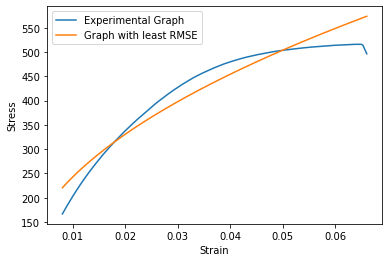

In [192]:
plt.plot(new_strain[149:],new_stress[149:],label='Experimental Graph')
plt.xlabel('Strain')
plt.ylabel('Stress')
best_graph=25.182481+2076.266949*np.power(new_strain,0.489796)
plt.plot(new_strain[149:],best_graph[149:],label='Graph with least RMSE')
plt.legend()

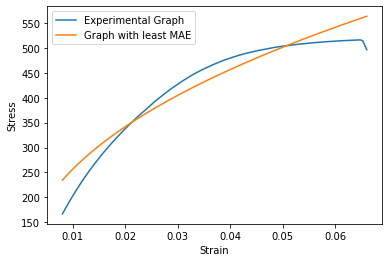

In [193]:
plt.plot(new_strain[149:],new_stress[149:],label='Experimental Graph')
plt.xlabel('Strain')
plt.ylabel('Stress')
best_graph=10.175853+1774.145451*np.power(new_strain,0.428571)
plt.plot(new_strain[149:],best_graph[149:],label='Graph with least MAE')
plt.legend()

In [194]:
df.shape

(1125000, 5)

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df[['A','B','n']],df['MAE'],test_size=0.15,random_state=0)

In [196]:
train_df=pd.concat([X_train,Y_train],axis=1)
test_df=pd.concat([X_test,Y_test],axis=1)

In [197]:
train_df.shape,test_df.shape

((956250, 4), (168750, 4))

In [198]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((956250, 3), (168750, 3), (956250,), (168750,))

In [199]:
train_df.corr()['MAE'].sort_values()

n     -0.383754
A     -0.132587
B      0.199073
MAE    1.000000
Name: MAE, dtype: float64

In [200]:
train_df.head()

,A,B,n,MAE
667972,339.631742,1696.071440,1.346939,96.189329
18893,25.182481,119.097124,2.632653,383.777684
502505,175.160554,1088.030482,0.306122,141.958271
31918,163.304804,2448.649319,1.102041,185.707929
263770,31.966572,2128.107177,1.224490,341.809732


<AxesSubplot:xlabel='MAE', ylabel='Count'>

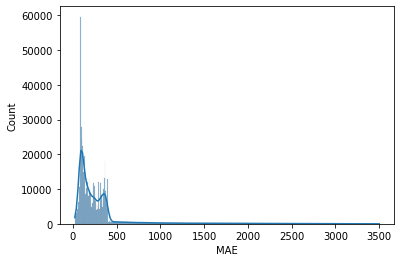

In [201]:
# plt.figure(figsize=(35,8))
sns.histplot(train_df['MAE'],kde=True)
# plt.xticks(np.arange(0,4000,50))

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'MAE'}>]], dtype=object)

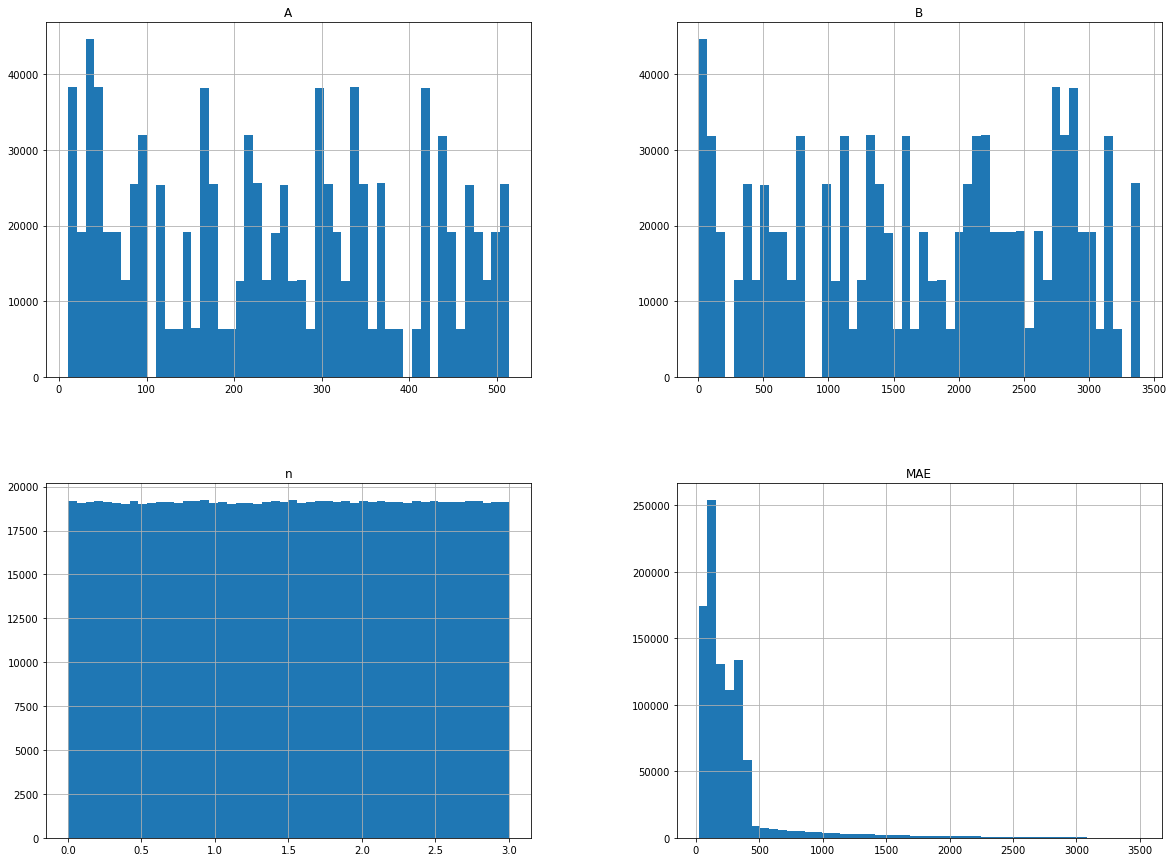

In [202]:
train_df.hist(bins=50,figsize=(20,15))

## Model Training

In [203]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

### Linear Regression

In [206]:
lr_model=LinearRegression()
lr_model.fit(X_train_scaled, Y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(Y_test, y_pred_lr)
mae_lr = mean_absolute_error(Y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  106196.23090223633
Mean absolute error from linear regression:  195.51897896462197


In [207]:
Y_test.shape

(168750,)

In [208]:
r2_lr = r2_score(Y_test, y_pred_lr)
print('r2 score for linear regression model is', r2_lr)

r2 score for linear regression model is 0.20247593236400374


Text(0.5, 1.0, 'One in 10 differences, Linear Regression')

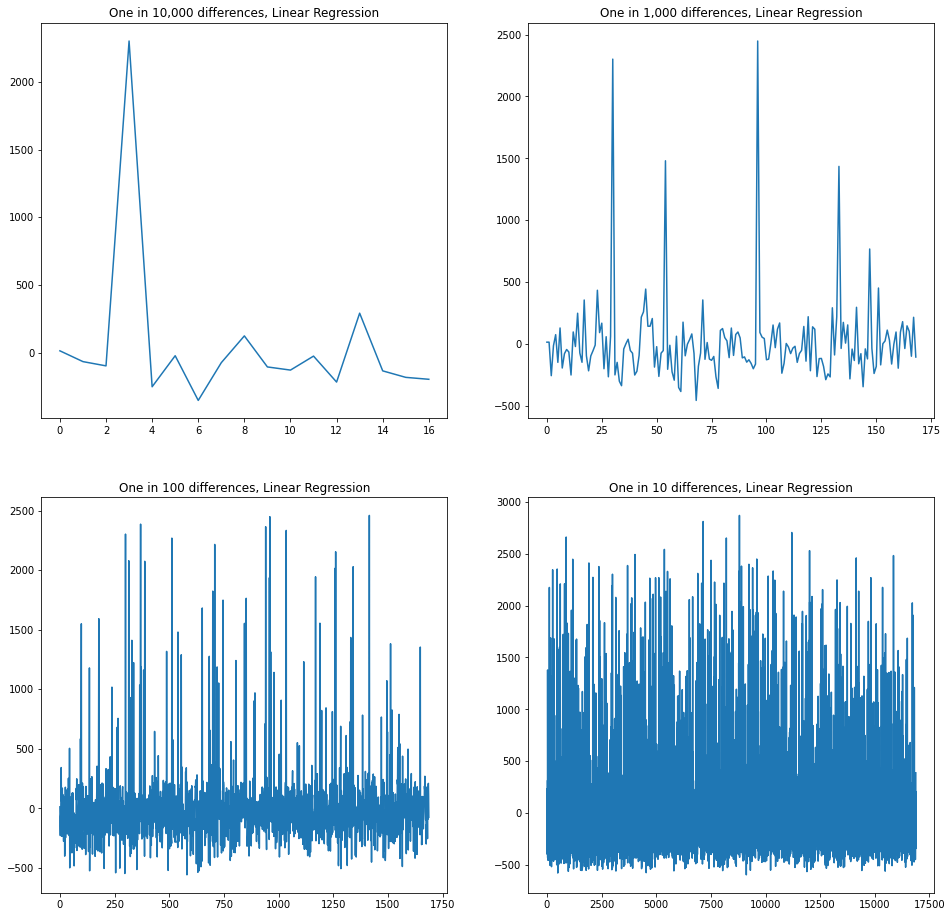

In [209]:
fig,ax=plt.subplots(2,2,figsize=(16,16))


diff_lr=np.array(Y_test - y_pred_lr)
ax[0,0].plot(diff_lr[::10000])
ax[0,0].set_title("One in 10,000 differences, Linear Regression")
ax[0,1].plot(diff_lr[::1000])
ax[0,1].set_title("One in 1,000 differences, Linear Regression")
ax[1,0].plot(diff_lr[::100])
ax[1,0].set_title("One in 100 differences, Linear Regression")
ax[1,1].plot(diff_lr[::10])
ax[1,1].set_title("One in 10 differences, Linear Regression")

<AxesSubplot:xlabel='MAE', ylabel='Count'>

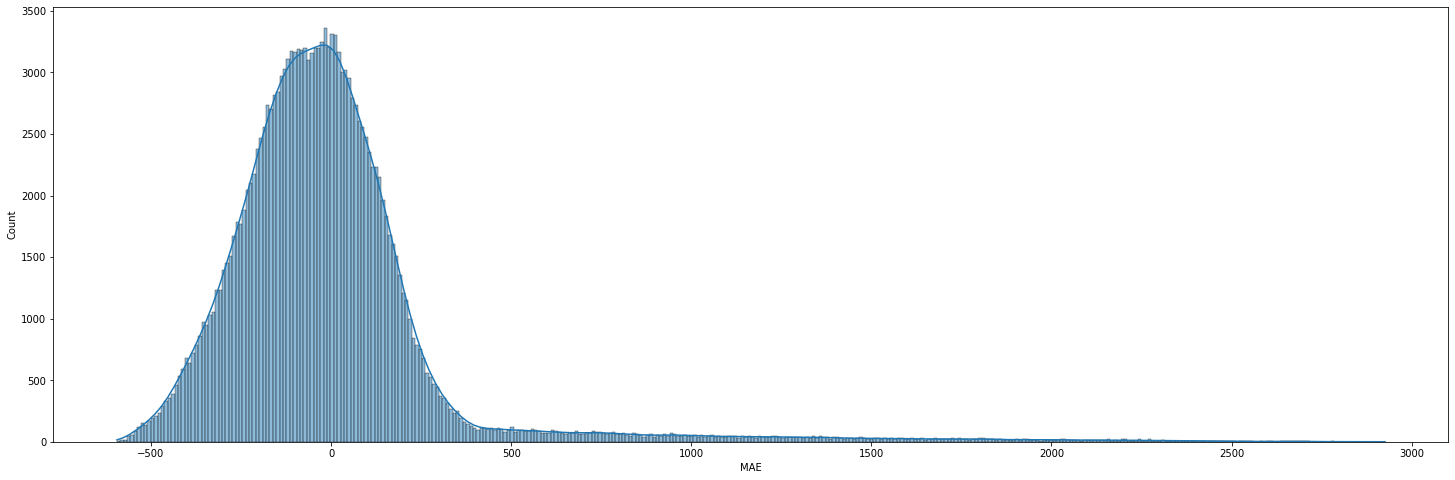

In [210]:
plt.figure(figsize=(25,8))
sns.histplot(Y_test - y_pred_lr,kde=True)
# plt.xticks(np.arange(-350,1000,50))

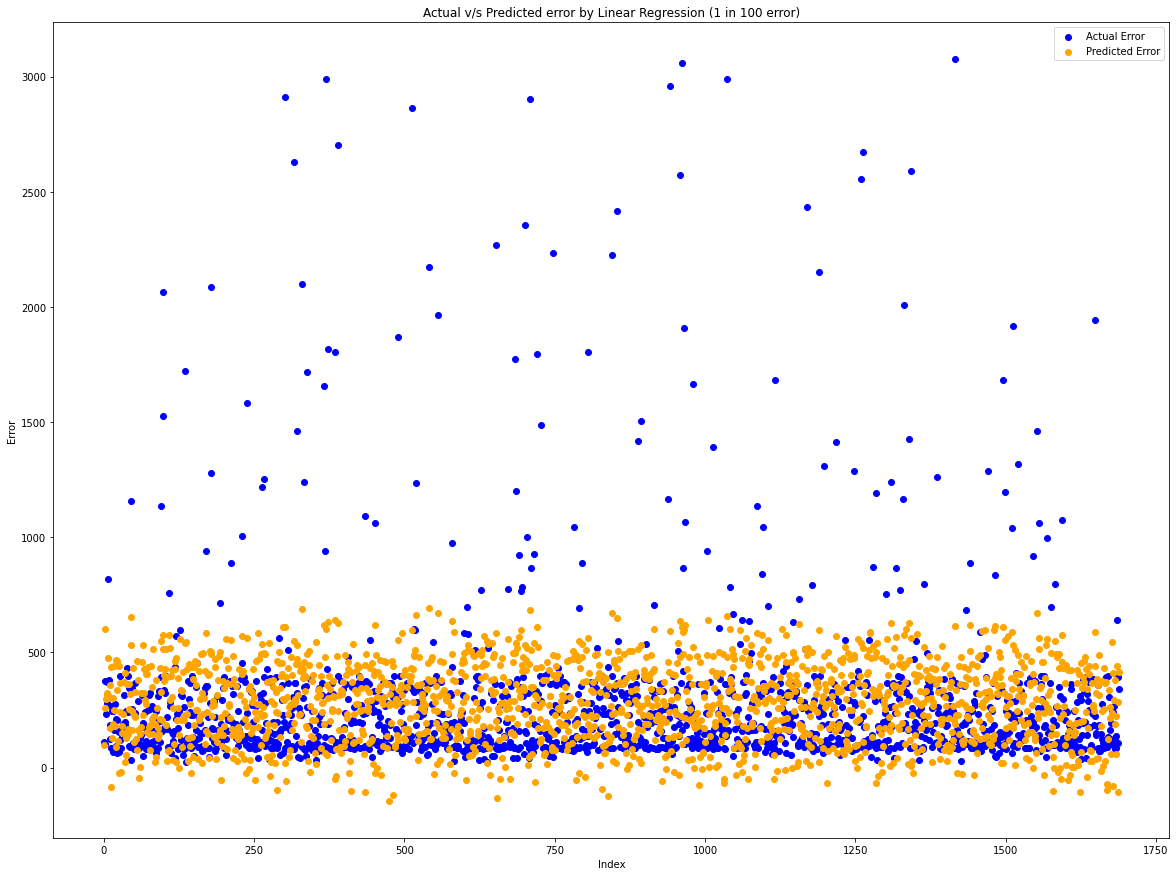

In [211]:
plt.figure(figsize=(20,15))
plt.scatter(np.arange(1,1689),Y_test[::100],label='Actual Error',color='blue')
plt.scatter(np.arange(1,1689),y_pred_lr[::100],label='Predicted Error',color='orange')
plt.ylabel('Error')
plt.xlabel('Index')
plt.title('Actual v/s Predicted error by Linear Regression (1 in 100 error)')
plt.legend()

In [212]:
np.array(Y_test[:10]).reshape(10,1)

array([[111.971415  ],
       [124.85918117],
       [360.59577311],
       [132.59445811],
       [232.05132408],
       [198.03442033],
       [367.45634263],
       [ 85.14018205],
       [175.33559353],
       [ 85.90590712]])

In [213]:
y_pred_lr[:10].reshape(10,1)

array([[ 98.2592339 ],
       [266.99305605],
       [301.80265404],
       [ 33.10128   ],
       [124.98703249],
       [ 94.1778952 ],
       [179.82222921],
       [119.69967803],
       [171.46918214],
       [181.9533066 ]])

### Decision Tree

In [214]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, Y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(Y_test, y_pred_tree)
mae_dt = mean_absolute_error(Y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  1.451424261679351
Mean absolute error using decision tree:  0.44277807576568806


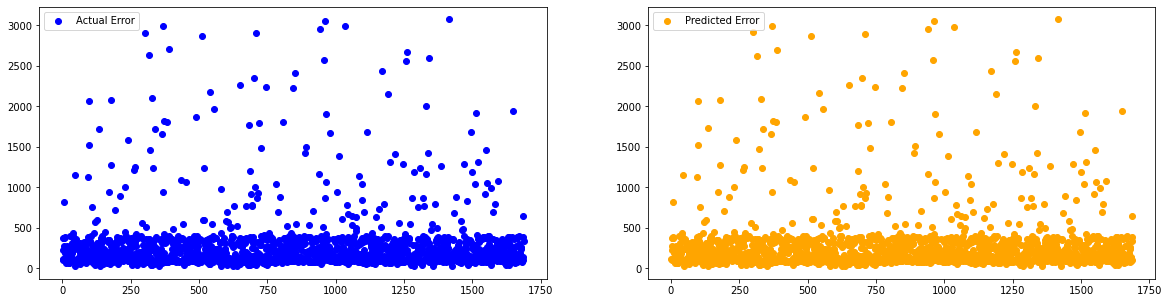

In [215]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.scatter(np.arange(1,1689),Y_test[::100],label='Actual Error',color='blue')
ax1.legend()
ax2.scatter(np.arange(1,1689),y_pred_tree[::100],label='Predicted Error',color='orange')
ax2.legend()

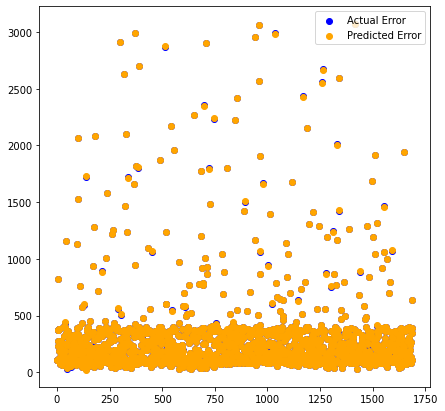

In [216]:
plt.figure(figsize=(7,7))
plt.scatter(np.arange(1,1689),Y_test[::100],label='Actual Error',color='blue')
plt.scatter(np.arange(1,1689),y_pred_tree[::100],label='Predicted Error',color='orange')
plt.legend()

In [217]:
diff_tree= (np.array(Y_test - y_pred_tree))

Text(0.5, 1.0, 'One in 10 differences, Decision Trees')

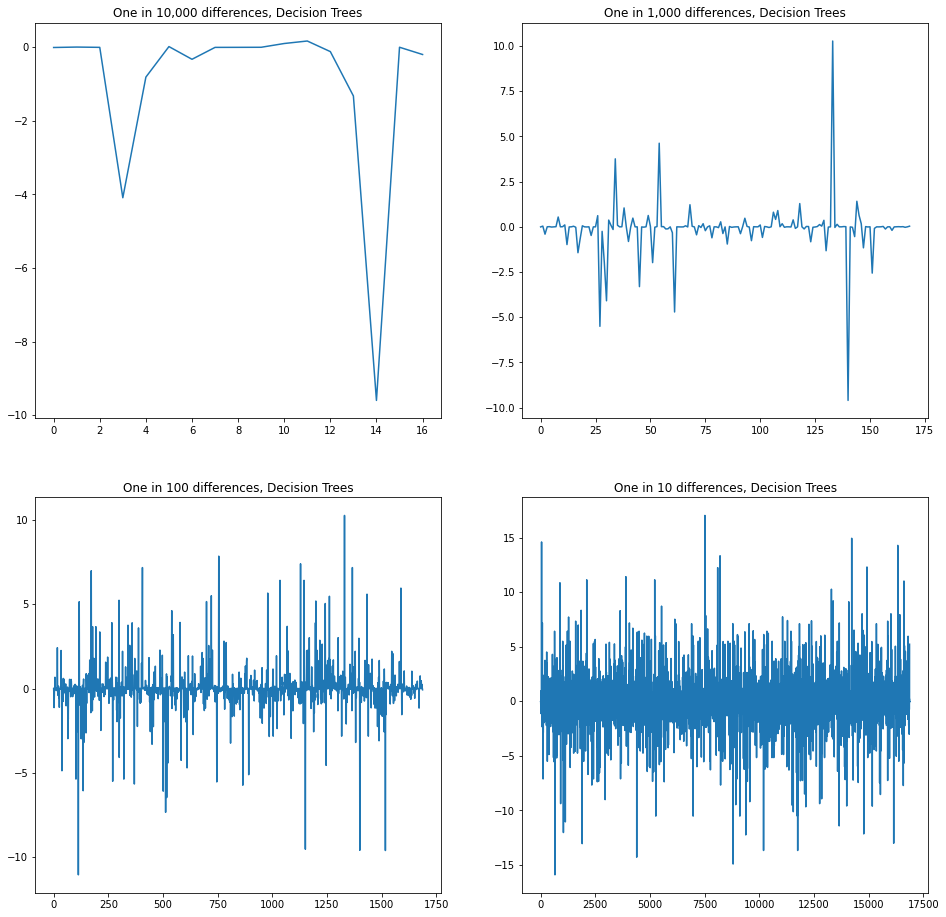

In [218]:
fig,ax=plt.subplots(2,2,figsize=(16,16))

ax[0,0].plot(diff_tree[::10000])
ax[0,0].set_title("One in 10,000 differences, Decision Trees")
ax[0,1].plot(diff_tree[::1000])
ax[0,1].set_title("One in 1,000 differences, Decision Trees")
ax[1,0].plot(diff_tree[::100])
ax[1,0].set_title("One in 100 differences, Decision Trees")
ax[1,1].plot(diff_tree[::10])
ax[1,1].set_title("One in 10 differences, Decision Trees")

<AxesSubplot:ylabel='Count'>

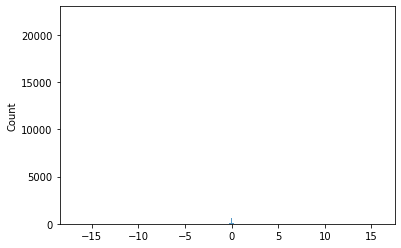

In [152]:
sns.histplot(np.array(Y_test - y_pred_tree))

In [219]:
r2_dt = r2_score(Y_test, y_pred_tree)
print('r2 score for decision tree model is', r2_dt)

r2 score for decision tree model is 0.999989099935363


In [220]:
np.array(Y_test[:10]).reshape(10,1)

array([[111.971415  ],
       [124.85918117],
       [360.59577311],
       [132.59445811],
       [232.05132408],
       [198.03442033],
       [367.45634263],
       [ 85.14018205],
       [175.33559353],
       [ 85.90590712]])

In [221]:
y_pred_tree[:10].reshape(10,1)

array([[111.97589426],
       [124.68981414],
       [360.54339563],
       [132.59464713],
       [232.04350754],
       [198.03634649],
       [367.45824693],
       [ 85.14088993],
       [175.32817474],
       [ 85.90168259]])

### Random Forest

In [222]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor()
model_RF.fit(X_train_scaled, Y_train)

y_pred_RF = model_RF.predict(X_test_scaled)

mse_RF = mean_squared_error(Y_test, y_pred_RF)
mae_RF = mean_absolute_error(Y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

Mean squared error using Random Forest:  0.4849824006922222
Mean absolute error Using Random Forest:  0.2744942402453959


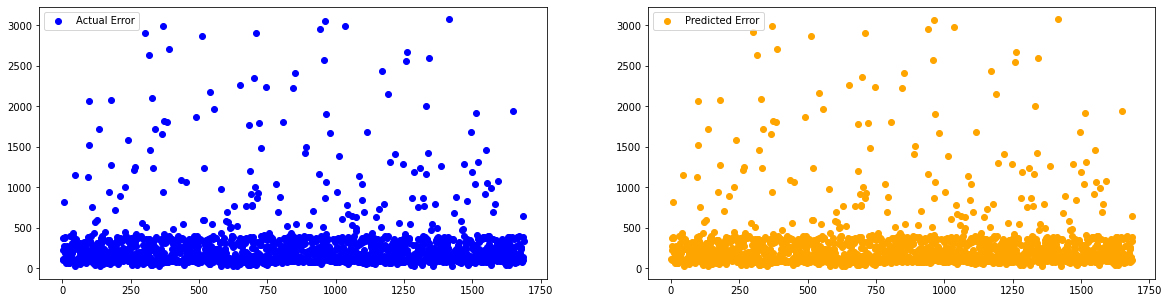

In [226]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.scatter(np.arange(1,1689),Y_test[::100],label='Actual Error',color='blue')
ax1.legend()
ax2.scatter(np.arange(1,1689),y_pred_RF[::100],label='Predicted Error',color='orange')
ax2.legend()

Text(0.5, 1.0, 'One in 10 differences, Random Forest')

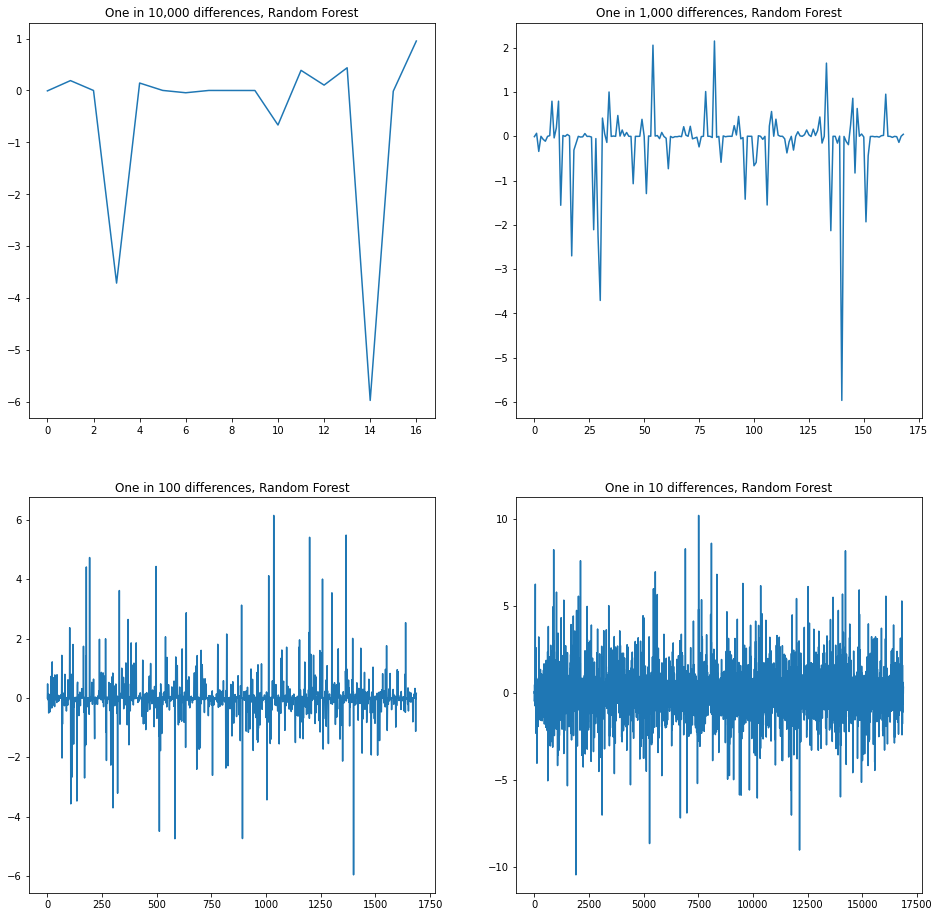

In [227]:
fig,ax=plt.subplots(2,2,figsize=(16,16))
diff_RF= (np.array(Y_test - y_pred_RF))
ax[0,0].plot(diff_RF[::10000])
ax[0,0].set_title("One in 10,000 differences, Random Forest")
ax[0,1].plot(diff_RF[::1000])
ax[0,1].set_title("One in 1,000 differences, Random Forest")
ax[1,0].plot(diff_RF[::100])
ax[1,0].set_title("One in 100 differences, Random Forest")
ax[1,1].plot(diff_RF[::10])
ax[1,1].set_title("One in 10 differences, Random Forest")

In [228]:
# plt.figure(figsize=(25,8))
# sns.histplot(Y_test - y_pred_RF,kde=True)
# plt.xticks(np.linspace(-350,1000,50))

In [268]:
r2_knn = r2_score(Y_test, y_pred_knn)
print('r2 score for Random Forest model is', r2_knn)

r2 score for Random Forest model is 0.9999625681883078


In [230]:
np.array(Y_test[:10]).reshape(10,1)

array([[111.971415  ],
       [124.85918117],
       [360.59577311],
       [132.59445811],
       [232.05132408],
       [198.03442033],
       [367.45634263],
       [ 85.14018205],
       [175.33559353],
       [ 85.90590712]])

In [231]:
y_pred_RF[:10].reshape(10,1)

array([[111.97908998],
       [124.90329863],
       [360.6064647 ],
       [132.59316119],
       [232.04940275],
       [198.03647234],
       [367.45797853],
       [ 85.12987036],
       [175.3286463 ],
       [ 85.89404428]])

### K Nearest Neighbour

In [232]:
knn=KNeighborsRegressor()
knn.fit(X_train_scaled, Y_train)
y_pred_knn = knn.predict(X_test_scaled)
mse_knn = mean_squared_error(Y_test, y_pred_knn)
mae_knn = mean_absolute_error(Y_test, y_pred_knn)
print('Mean squared error using K nearest neighbours: ', mse_knn)
print('Mean absolute error using K nearest neighbours: ', mae_knn)

Mean squared error using K nearest neighbours:  4.984322704313498
Mean absolute error using K nearest neighbours:  1.0608713684079194


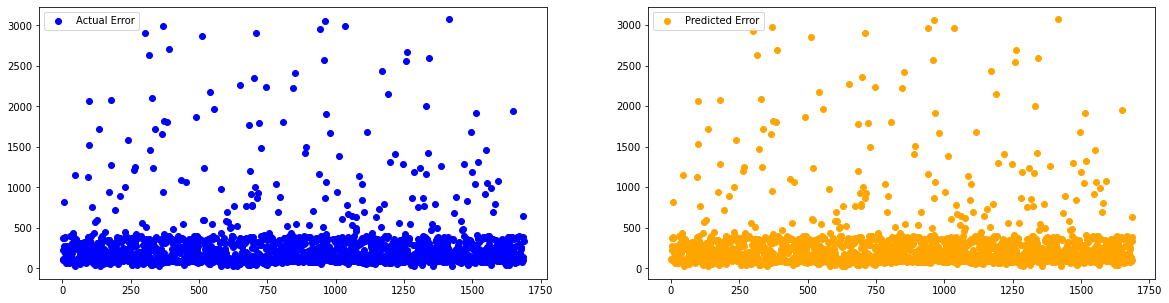

In [233]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.scatter(np.arange(1,1689),Y_test[::100],label='Actual Error',color='blue')
ax1.legend()
ax2.scatter(np.arange(1,1689),y_pred_knn[::100],label='Predicted Error',color='orange')
ax2.legend()

Text(0.5, 1.0, 'One in 10 differences, K-Nearest Neighbour')

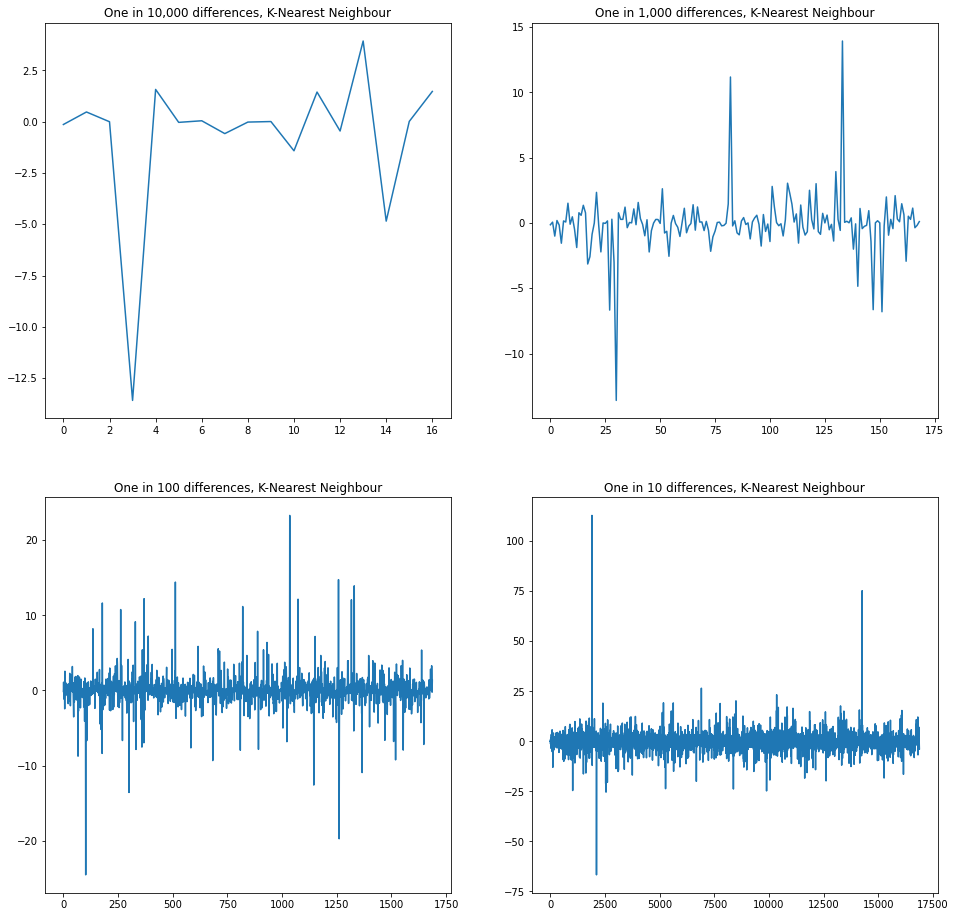

In [234]:
fig,ax=plt.subplots(2,2,figsize=(16,16))
diff_knn= (np.array(Y_test - y_pred_knn))

ax[0,0].plot(diff_knn[::10000])
ax[0,0].set_title("One in 10,000 differences, K-Nearest Neighbour")
ax[0,1].plot(diff_knn[::1000])
ax[0,1].set_title("One in 1,000 differences, K-Nearest Neighbour")
ax[1,0].plot(diff_knn[::100])
ax[1,0].set_title("One in 100 differences, K-Nearest Neighbour")
ax[1,1].plot(diff_knn[::10])
ax[1,1].set_title("One in 10 differences, K-Nearest Neighbour")

In [235]:
r2_knn = r2_score(Y_test, y_pred_knn)
print('r2 score for K nearest neighbours is', r2_knn)

r2 score for K nearest neighbours is 0.9999625681883078


In [236]:
np.array(Y_test[:10]).reshape(10,1)

array([[111.971415  ],
       [124.85918117],
       [360.59577311],
       [132.59445811],
       [232.05132408],
       [198.03442033],
       [367.45634263],
       [ 85.14018205],
       [175.33559353],
       [ 85.90590712]])

In [237]:
y_pred_knn[:10].reshape(10,1)

array([[112.11067024],
       [125.23556859],
       [360.53492953],
       [132.83327898],
       [232.76615468],
       [198.07192866],
       [367.57101947],
       [ 85.12867092],
       [174.10421496],
       [ 85.64527899]])

## Ridge Regression

In [238]:
from sklearn.linear_model import Ridge
ridge= Ridge()
ridge.fit(X_train_scaled, Y_train)
y_pred_rid = ridge.predict(X_test_scaled)
mse_rid = mean_squared_error(Y_test, y_pred_rid)
mae_rid = mean_absolute_error(Y_test, y_pred_rid)
print('Mean squared error using Ridge Regression: ', mse_rid)
print('Mean absolute error using Ridge Regression: ', mae_rid)

Mean squared error using Ridge Regression:  106196.23040039543
Mean absolute error using Ridge Regression:  195.51891952962026


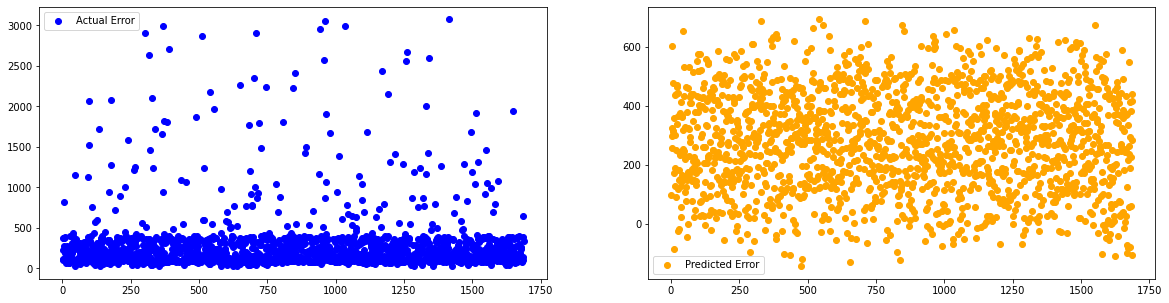

In [239]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.scatter(np.arange(1,1689),Y_test[::100],label='Actual Error',color='blue')
ax1.legend()
ax2.scatter(np.arange(1,1689),y_pred_rid[::100],label='Predicted Error',color='orange')
ax2.legend()

Text(0.5, 1.0, 'One in 10 differences, Ridge Regression')

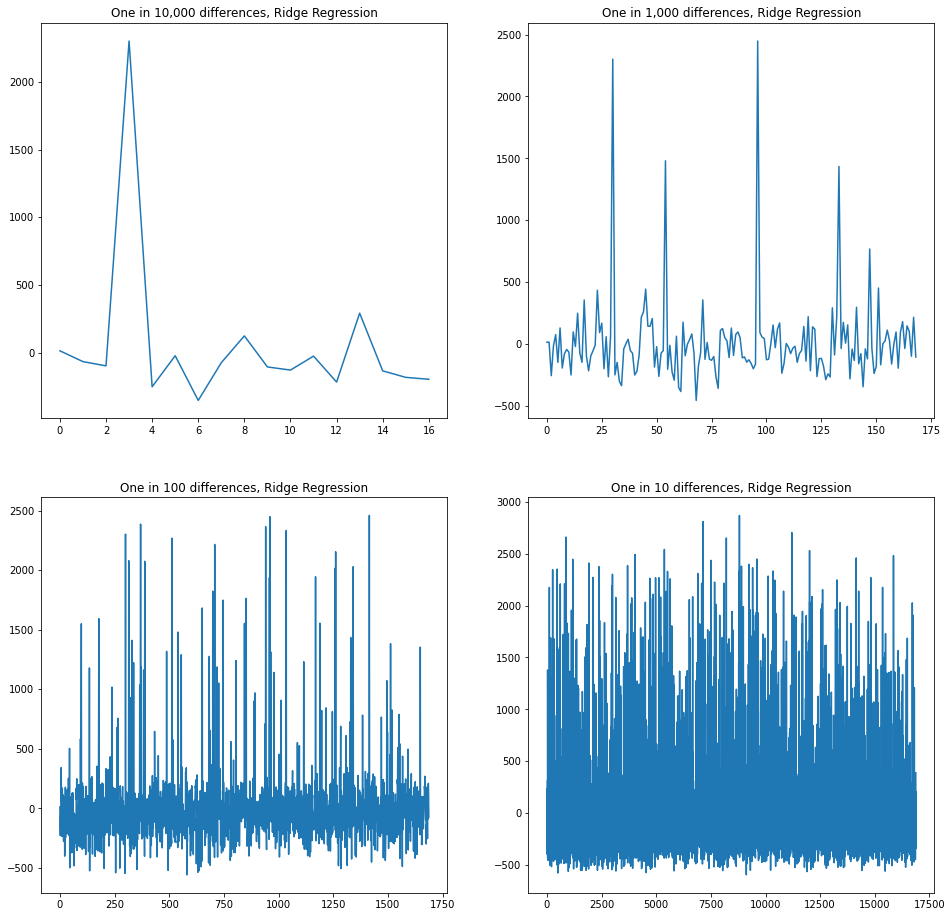

In [240]:
fig,ax=plt.subplots(2,2,figsize=(16,16))
diff_rid= (np.array(Y_test - y_pred_rid))

ax[0,0].plot(diff_rid[::10000])
ax[0,0].set_title("One in 10,000 differences, Ridge Regression")
ax[0,1].plot(diff_rid[::1000])
ax[0,1].set_title("One in 1,000 differences, Ridge Regression")
ax[1,0].plot(diff_rid[::100])
ax[1,0].set_title("One in 100 differences, Ridge Regression")
ax[1,1].plot(diff_rid[::10])
ax[1,1].set_title("One in 10 differences, Ridge Regression")

<AxesSubplot:xlabel='MAE', ylabel='Count'>

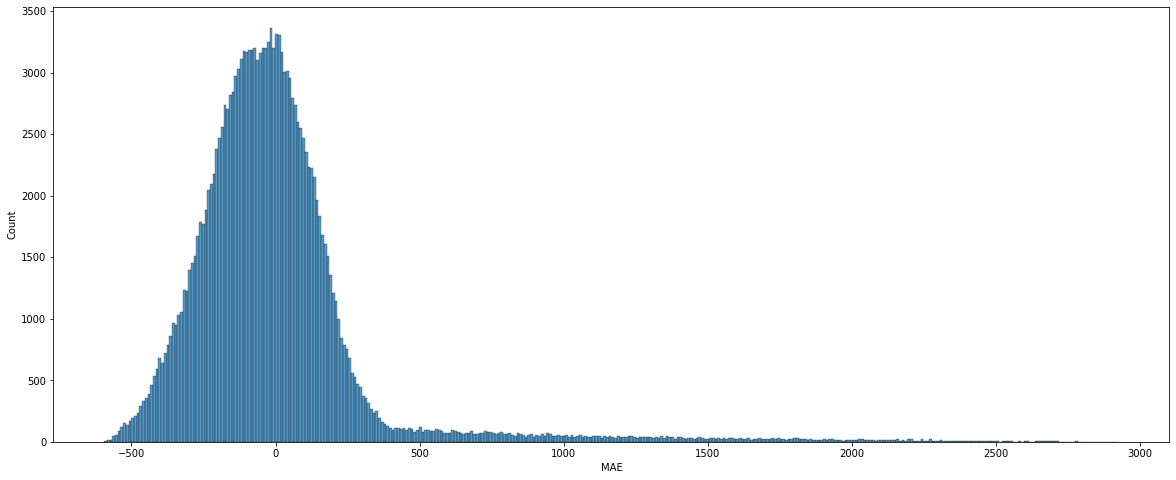

In [241]:
plt.figure(figsize=(20,8))
sns.histplot(Y_test - y_pred_rid)
# plt.xticks(np.arange(-350,1000,50))

In [242]:
r2_rid = r2_score(Y_test, y_pred_rid)
print('r2 score for Ridge Regression is', r2_rid)

r2 score for Ridge Regression is 0.20247593613278336


## Lasso Regression

In [243]:
lasso= Lasso()
lasso.fit(X_train_scaled, Y_train)
y_pred_las = lasso.predict(X_test_scaled)
mse_las = mean_squared_error(Y_test, y_pred_las)
mae_las = mean_absolute_error(Y_test, y_pred_las)
print('Mean squared error using Lasso Regression: ', mse_las)
print('Mean absolute error using Lasso Regression: ', mae_las)

Mean squared error using Lasso Regression:  106196.32265940237
Mean absolute error using Lasso Regression:  195.12946374872615


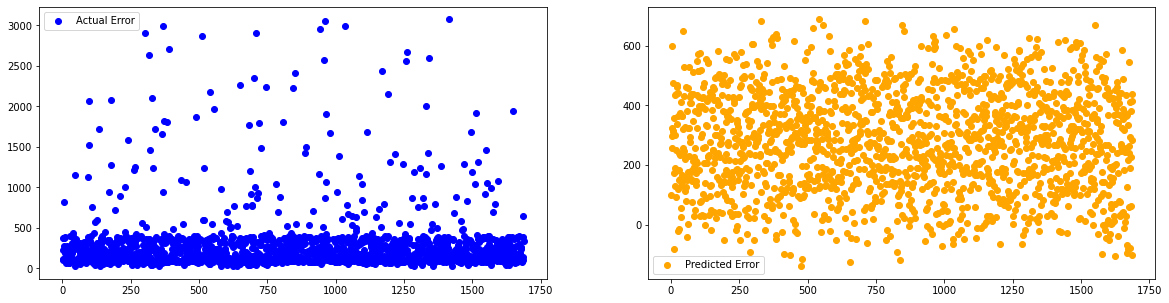

In [244]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.scatter(np.arange(1,1689),Y_test[::100],label='Actual Error',color='blue')
ax1.legend()
ax2.scatter(np.arange(1,1689),y_pred_las[::100],label='Predicted Error',color='orange')
ax2.legend()

Text(0.5, 1.0, 'One in 10 differences, Lasso Regression')

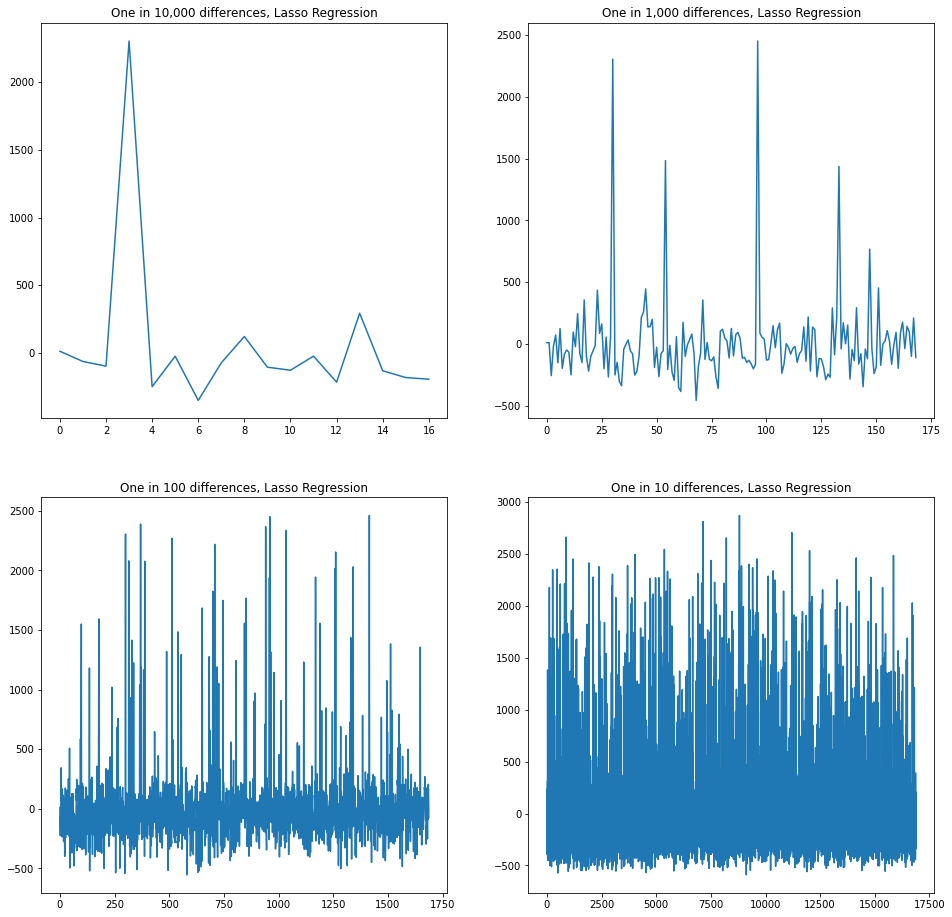

In [245]:
fig,ax=plt.subplots(2,2,figsize=(16,16))
diff_las= (np.array(Y_test - y_pred_las))

ax[0,0].plot(diff_las[::10000])
ax[0,0].set_title("One in 10,000 differences, Lasso Regression")
ax[0,1].plot(diff_las[::1000])
ax[0,1].set_title("One in 1,000 differences, Lasso Regression")
ax[1,0].plot(diff_las[::100])
ax[1,0].set_title("One in 100 differences, Lasso Regression")
ax[1,1].plot(diff_las[::10])
ax[1,1].set_title("One in 10 differences, Lasso Regression")

In [246]:
r2_las = r2_score(Y_test, y_pred_las)
print('r2 score for Lasso Regression is', r2_las)

r2 score for Lasso Regression is 0.2024752432760043


<AxesSubplot:xlabel='MAE', ylabel='Count'>

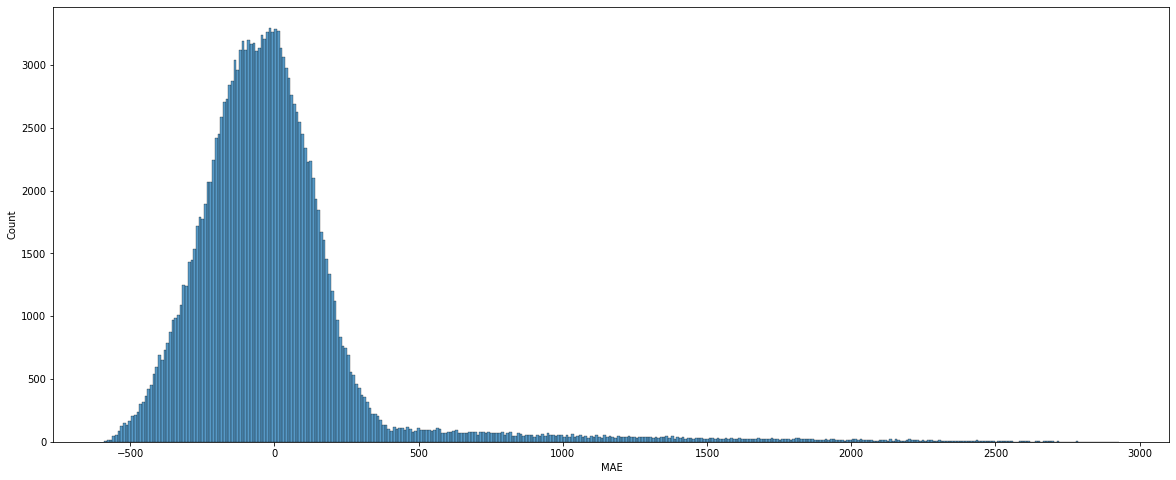

In [247]:
plt.figure(figsize=(20,8))
sns.histplot(Y_test - y_pred_las)
# plt.xticks(np.arange(-350,1000,50))

## Ridge along with polynomial Regression

In [248]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(df[['A','B','n']])
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_F1_poly,df['MAE'],
                                                   random_state = 0)
linreg = Ridge().fit(X_train_poly, y_train_poly)
y_pred_poly= linreg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
print('Mean squared error using Ridge with polynomial regression: ', mse_poly)
print('Mean absolute error using Ridge with polynomial regression: ', mae_poly)

Mean squared error using Ridge with polynomial regression:  61944.782706954386
Mean absolute error using Ridge with polynomial regression:  166.94746281206042


C:\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.61148e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [249]:
r2_poly = r2_score(y_test_poly,y_pred_poly)
print('r2 score for Polynomial Regression is', r2_poly)

r2 score for Polynomial Regression is 0.5375212902234179


In [250]:
# from sklearn.svm import SVR
# regressor = SVR(kernel = 'rbf')
# regressor.fit(X_train_scaled, Y_train)
# y_pred_rbf = regressor.predict(X_test_scaled)
# mse_rbf = mean_squared_error(Y_test, y_pred_rbf)
# mae_rbf = mean_absolute_error(Y_test, y_pred_rbf)
# print('Mean squared error using Support Vector regressor (rbf krenel) : ', mse_rbf)
# print('Mean absolute error using Support Vector regressor (rbf krenel) : ', mae_rbf)

### Took huge amount of time still didnt got execute.

## Artificial Neural network

In [279]:
import tensorflow as tf 
from tensorflow import keras

In [252]:
model=keras.Sequential()
model.add(keras.layers.Dense(500,input_dim=3,activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(keras.layers.Dense(300,activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(keras.layers.Dense(150,activation='relu'))
model.add(keras.layers.Dense(150,activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(keras.layers.Dense(70,activation='relu'))
model.add(keras.layers.Dense(50,activation='relu'))
model.add(keras.layers.Dense(10,activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(keras.layers.Dense(5,activation='relu'))
model.add(keras.layers.Dense(1,activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 500)               2000      
                                                                 
 dense_47 (Dense)            (None, 300)               150300    
                                                                 
 dense_48 (Dense)            (None, 150)               45150     
                                                                 
 dense_49 (Dense)            (None, 150)               22650     
                                                                 
 dense_50 (Dense)            (None, 70)                10570     
                                                                 
 dense_51 (Dense)            (None, 50)                3550      
                                                                 
 dense_52 (Dense)            (None, 10)               

In [253]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('stress_strain_weights.h5', verbose=1, save_best_only=True)
model.fit(X_train_scaled,Y_train,
         epochs = 35,
         validation_split=0.2,
         callbacks = checkpointer
         )

Epoch 1/35
23907/23907 [==============================] - ETA: 0s - loss: 1632.7697 - mae: 12.4964
Epoch 1: val_loss improved from inf to 103.69144, saving model to stress_strain_weights.h5
23907/23907 [==============================] - 103s 4ms/step - loss: 1632.7697 - mae: 12.4964 - val_loss: 103.6914 - val_mae: 4.2430
Epoch 2/35
23907/23907 [==============================] - ETA: 0s - loss: 300.9057 - mae: 6.4576
Epoch 2: val_loss did not improve from 103.69144
23907/23907 [==============================] - 87s 4ms/step - loss: 300.9057 - mae: 6.4576 - val_loss: 532.7355 - val_mae: 8.8711
Epoch 3/35
23907/23907 [==============================] - ETA: 0s - loss: 247.4586 - mae: 5.5010
Epoch 3: val_loss improved from 103.69144 to 29.17776, saving model to stress_strain_weights.h5
23907/23907 [==============================] - 89s 4ms/step - loss: 247.4586 - mae: 5.5010 - val_loss: 29.1778 - val_mae: 3.2868
Epoch 4/35
23894/23907 [============================>.] - ETA: 0s - loss: 190.7

23907/23907 [==============================] - 1302s 54ms/step - loss: 40.5554 - mae: 2.0313 - val_loss: 2.2365 - val_mae: 0.9552
Epoch 30/35
23906/23907 [============================>.] - ETA: 0s - loss: 30.4398 - mae: 1.8920
Epoch 30: val_loss did not improve from 2.23650
23907/23907 [==============================] - 1352s 57ms/step - loss: 30.4395 - mae: 1.8920 - val_loss: 83.2921 - val_mae: 3.6350
Epoch 31/35
23906/23907 [============================>.] - ETA: 0s - loss: 27.8491 - mae: 1.9182
Epoch 31: val_loss did not improve from 2.23650
23907/23907 [==============================] - 1389s 58ms/step - loss: 27.8489 - mae: 1.9182 - val_loss: 19.6147 - val_mae: 1.7956
Epoch 32/35
23907/23907 [==============================] - ETA: 0s - loss: 27.7178 - mae: 1.8890
Epoch 32: val_loss did not improve from 2.23650
23907/23907 [==============================] - 1417s 59ms/step - loss: 27.7178 - mae: 1.8890 - val_loss: 10.3982 - val_mae: 1.8452
Epoch 33/35
23907/23907 [=================

In [261]:
from keras.models import Sequential, load_model

In [262]:
#Load and evaluate the best model version
model = load_model('stress_strain_weights.h5')
y_pred_ann = model.predict(X_test_scaled)
mse_ann = mean_squared_error(Y_test, y_pred_ann)
mae_ann = mean_absolute_error(Y_test, y_pred_ann)
print('Mean squared error using Artificial Neural Network: ', mse_ann)
print('Mean absolute error using Artificial Neural Network: ', mae_ann)

5274/5274 [==============================] - 62s 12ms/step
Mean squared error using Artificial Neural Network:  2.232024324313079
Mean absolute error using Artificial Neural Network:  0.9554095271959834


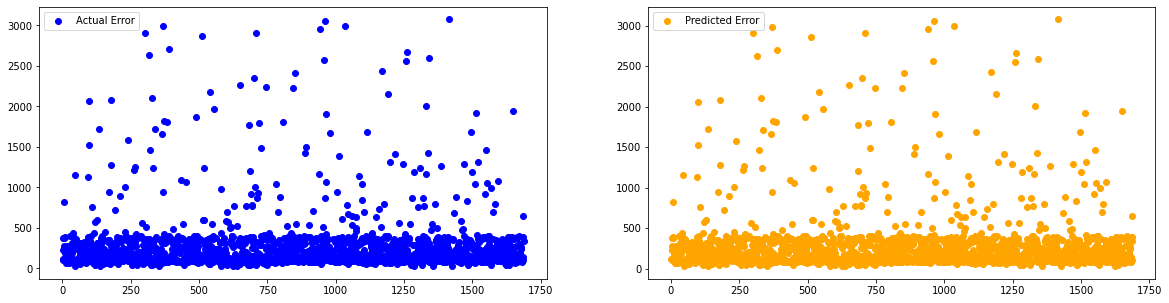

In [263]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.scatter(np.arange(1,1689),Y_test[::100],label='Actual Error',color='blue')
ax1.legend()
ax2.scatter(np.arange(1,1689),y_pred_ann[::100],label='Predicted Error',color='orange')
ax2.legend()

In [278]:
# fig,ax=plt.subplots(2,2,figsize=(16,16))
# diff_ann= (np.array(Y_test - y_pred_ann))

# ax[0,0].plot(diff_ann[::10000])
# ax[0,0].set_title("One in 10,000 differences, ANN")
# ax[0,1].plot(diff_ann[::1000])
# ax[0,1].set_title("One in 1,000 differences, ANN")
# ax[1,0].plot(diff_ann[::100])
# ax[1,0].set_title("One in 100 differences, ANN")
# ax[1,1].plot(diff_ann[::10])
# ax[1,1].set_title("One in 10 differences, ANN")

In [265]:
r2_ann = r2_score(Y_test, y_pred_ann)
print('r2 score for ANN is', r2_ann)

r2 score for ANN is 0.9999832376996521


In [266]:
np.array(Y_test[:10]).reshape(10,1)

array([[111.971415  ],
       [124.85918117],
       [360.59577311],
       [132.59445811],
       [232.05132408],
       [198.03442033],
       [367.45634263],
       [ 85.14018205],
       [175.33559353],
       [ 85.90590712]])

In [267]:
y_pred_ann[:10].reshape(10,1)

array([[111.918655],
       [125.5314  ],
       [361.89258 ],
       [132.52309 ],
       [232.46512 ],
       [198.184   ],
       [368.54718 ],
       [ 84.40029 ],
       [176.00471 ],
       [ 85.660866]], dtype=float32)

In [286]:
a=int(input('Enter the value of A'))
b=int(input("Enter the value of B"))
c=float(input('Enter the value of n'))

Enter the value of A37
Enter the value of B1077
Enter the value of n0.29


In [287]:
scaled_input=scaler.transform([[a,b,c]])
scaled_input

C:\Python37\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.3628692 , -0.62194566, -1.36996945]])

In [288]:
calc_stress=a+b*(np.power(exp_strain,c))

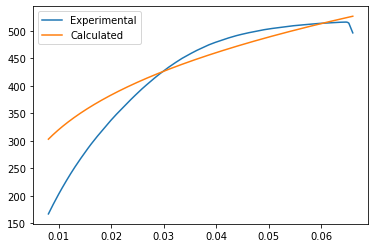

In [289]:
plt.plot(exp_strain,exp_stress,label='Experimental')
plt.plot(exp_strain,calc_stress,label='Calculated')
plt.legend()

In [290]:
print("Actual MAE : ",mae(exp_stress,calc_stress))
print("Predicted MAE by ANN: ",model.predict(scaled_input)[0][0])
print("Predicted MAE by Random Forest: ",model_RF.predict(scaled_input)[0])
print("Predicted MAE by Decision Trees: ",tree.predict(scaled_input)[0])
print("Predicted MAE by KNN: ",knn.predict(scaled_input)[0])

Actual MAE :  33.42349476598362
1/1 [==============================] - 0s 174ms/step
Predicted MAE by ANN:  35.510117
Predicted MAE by Random Forest:  37.164906219393494
Predicted MAE by Decision Trees:  37.245877204340886
Predicted MAE by KNN:  37.02536609753493


In [275]:
import pickle

In [276]:
pickle.dump(model, open('ANN_explo_model.pkl','wb'))


INFO:tensorflow:Assets written to: ram://1600cca9-2485-4ded-be69-8c25d3c23e9b/assets


INFO:tensorflow:Assets written to: ram://1600cca9-2485-4ded-be69-8c25d3c23e9b/assets


In [277]:
pickle.dump(model_RF, open('RF_explo_model.pkl','wb'))

KeyboardInterrupt: 

In [ ]:
pickle.dump(tree, open('DT_explo_model.pkl','wb'))

In [ ]:
pickle.dump(knn, open('knn_explo_model.pkl','wb'))